# Historams

Histograms represent the distribution of pixel intensities in a model. The X- axis serves as bins in a Histogram. The plot represents the number of times a pixel intensity appears in an image. 

## Gray scale histogram

Let us see how to plot a histogram for a single chanel (gray scale image)

OpenCV provides a cv2.calcHist function that takes the following arguments


cv2.calcHist(images, channels, mask, histSize, ranges)

-  images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage] .
-  channels: A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0] . To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2] .
-  mask: Remember learning about masks in Section 1.4.8? Well, here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None .
-  histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32] .
-  ranges: The range of possible pixel values. Normally, this is [0, 256] (this is not a typo — the ending range of the cv2.calcHist  function is non-inclusive so you’ll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different.)

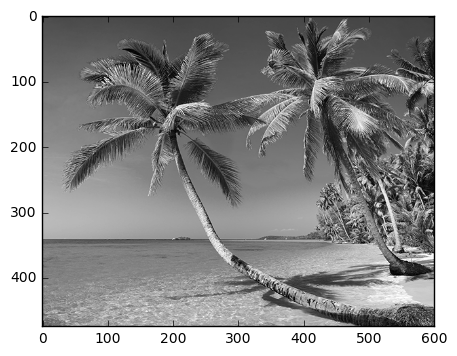

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image/beach.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')
plt.show()

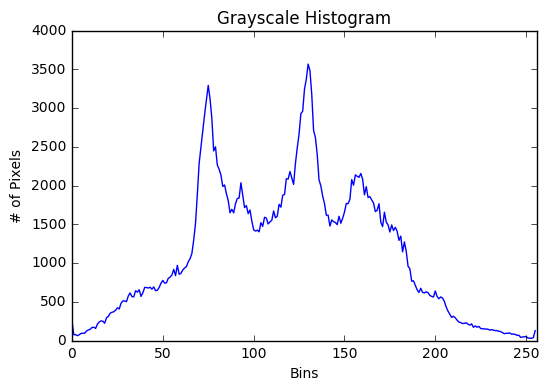

In [2]:
hist = cv2.calcHist([gray],[0],mask=None,histSize=[256],ranges=[0,256])

plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.xlim([0,256])
plt.show()

## Normalized Histograms

Comparing normalized histograms between two images is a better way to compare two image intensity distributions since it eliminates he dependency on the size of the image

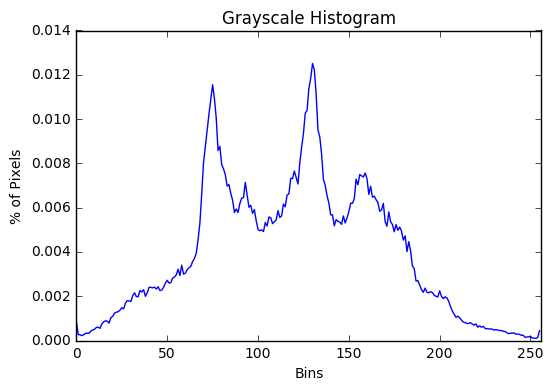

In [3]:
hist /= hist.sum()

plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.xlim([0,256])
plt.show()


## Color Image Histograms



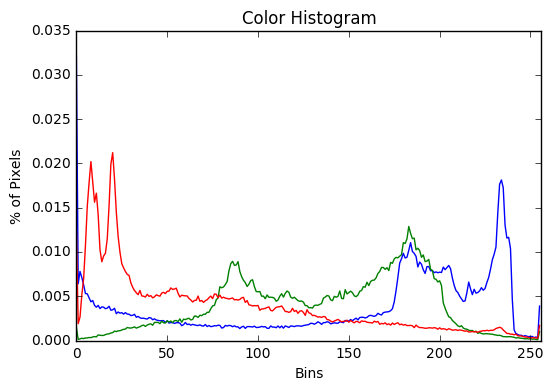

In [4]:
color = ('b','g','r')
for i,c in enumerate(color):
    hist = cv2.calcHist([image],[i],mask=None,histSize=[256],ranges=[0,256])
    hist /= hist.sum()
    plt.plot(hist,color=c)
    
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.xlim([0,256])
plt.show()

## 2D Histograms 


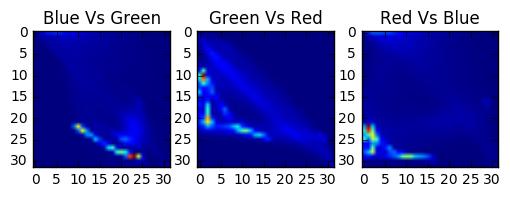

In [5]:
chans = cv2.split(image)

fig = plt.figure()
ax = fig.add_subplot(131)

hist = cv2.calcHist([chans[0],chans[1]],[0,1],mask=None,histSize=[32,32],ranges=[0,256,0,256])
ax.set_title('Blue Vs Green')
ax.imshow(hist)

ax = fig.add_subplot(132)
ax.set_title('Green Vs Red')
hist = cv2.calcHist([chans[1],chans[2]],[0,1],mask=None,histSize=[32,32],ranges=[0,256,0,256])
ax.imshow(hist)


ax = fig.add_subplot(133)
ax.set_title("Red Vs Blue")
hist = cv2.calcHist([chans[0],chans[2]],[0,1],mask=None,histSize=[32,32],ranges=[0,256,0,256])
ax.imshow(hist)

plt.show()

## Histogram Equalization 

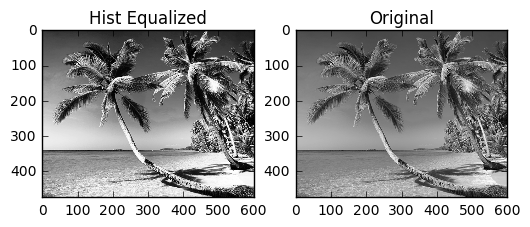

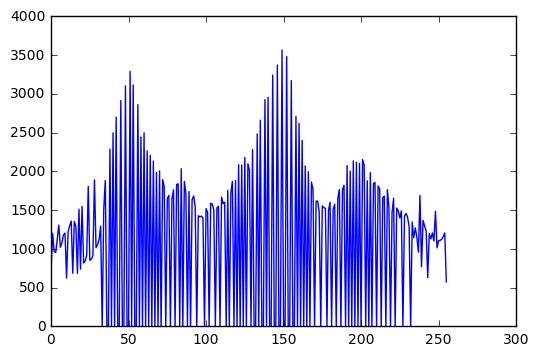

In [6]:
eqal = cv2.equalizeHist(gray)

fig = plt.figure()

ax = fig.add_subplot(121)
ax.imshow(eqal,cmap='gray')
ax.set_title("Hist Equalized")


hist = cv2.calcHist([eqal],[0],None,[256],[0,256])
ax = fig.add_subplot(122)
ax.imshow(gray,cmap='gray')
ax.set_title("Original")

plt.show()
plt.plot(hist)

plt.show()

## Histogram of a masked region

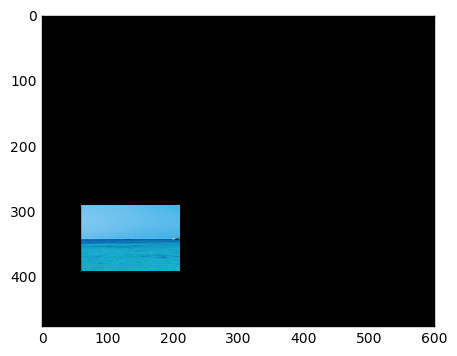

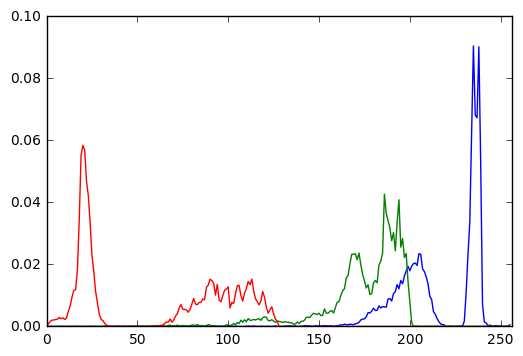

In [17]:
import numpy as np
mask = np.zeros(image.shape[:2], dtype="uint8")

cv2.rectangle(mask,(60, 290), (210, 390), 255, -1)

crop = cv2.bitwise_and(image,image, mask=mask)

plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.show()
colors = ('b','g','r')
for i,c in enumerate(colors):
    hist = cv2.calcHist([image],[i],mask,histSize=[256],ranges=[0,256])
    hist /= hist.sum()
    plt.plot(hist,color=c)
    plt.xlim([0,256])
    
plt.show()

Notice the use of cv2.COLOR_BGR2RB with plt.imshow to display the color image. This is because of OpenCV's BGR format instead of RGB 

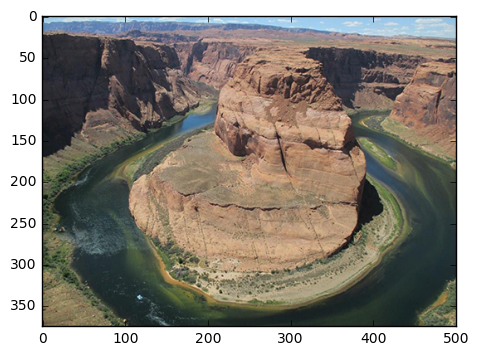

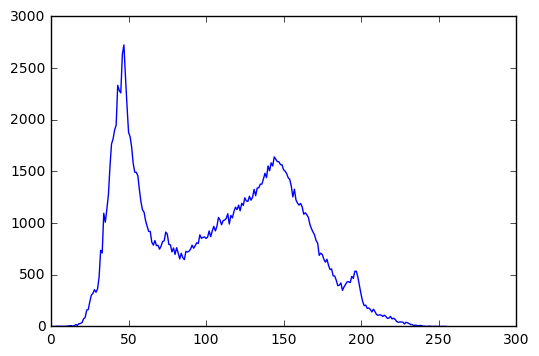

In [20]:
image = cv2.imread('image/horseshoe_bend.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

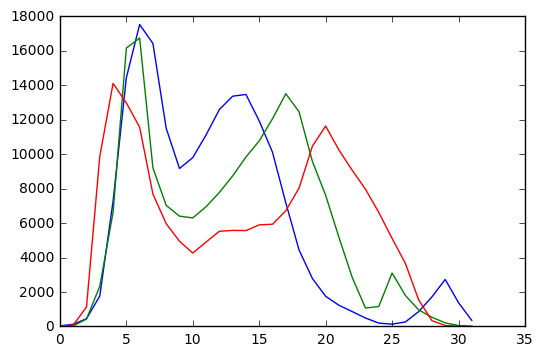

In [32]:
colors = ('b','g','r')

for i,c in enumerate(colors):
    hist = cv2.calcHist([image],[i],None,[32],[0,256])
    plt.plot(hist,color = c)

plt.show()

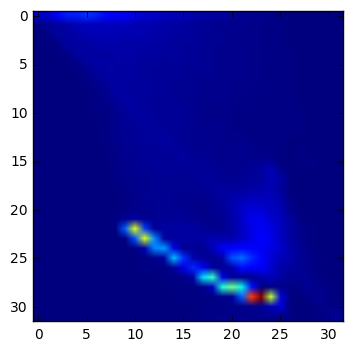

In [33]:

hist = cv2.calcHist([chans[0],chans[1]],[0,1],mask=None,histSize=[32,32],ranges=[0,256,0,256])
plt.imshow(hist)
plt.show()

In [34]:
print(cv2.equalizeHist(gray)[272][146])

210
